In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data = pd.read_csv('House_train_raw.csv')

In [52]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## ANÁLISIS EXPLORATORIO DE DATOS

#### Tratamiento de valores faltantes

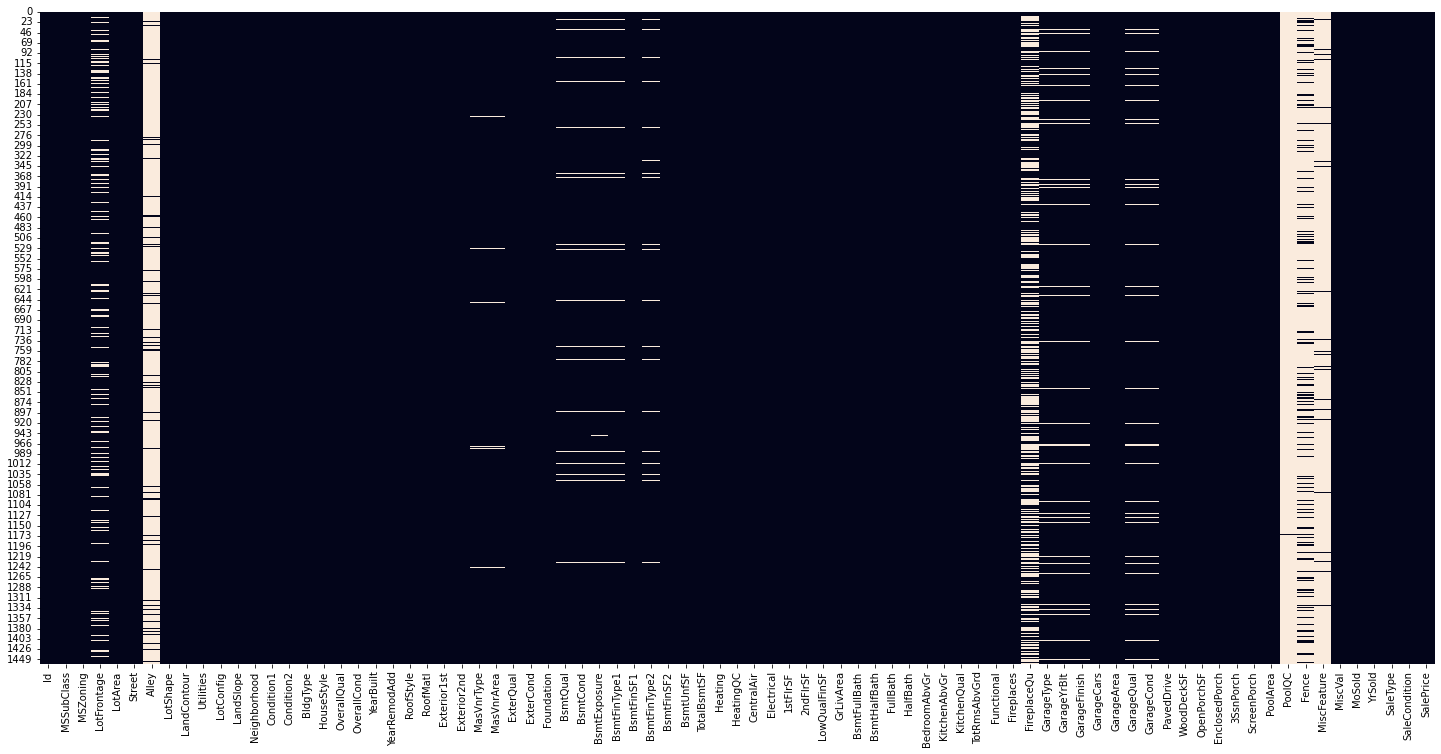

In [4]:
 #Graficamos dónde se encuentran los valores faltantes

plt.figure(figsize= (25,12))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [5]:
# Con una máscara, nos traemos todos los registros donde haya al menos una instancia con nulo en alguna columna

data[pd.isnull(data).any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
porcentaje_faltantes_alley = (data['Alley'].isnull().sum() / data.shape[0]) * 100
print('El total de faltantes para la columna Alley es de : ', round(porcentaje_faltantes_alley), '%')

El total de faltantes para la columna Alley es de :  94 %


In [57]:
# dropeamos esta columna, que practicamente no tiene valores

data.drop(columns = 'Alley', inplace = True)

In [8]:
porcentaje_faltantes_fireplacequ = (data['FireplaceQu'].isnull().sum() / data.shape[0]) * 100
print('El total de faltantes para la columna FireplaceQu es de : ', round(porcentaje_faltantes_fireplacequ), '%')

El total de faltantes para la columna FireplaceQu es de :  47 %


In [58]:
# Dropeamos esta columna también, ya que casi la mitad no tiene registros y además la información que brinda es intrascendente

data.drop(columns = 'FireplaceQu', inplace = True)

In [10]:
# Observamos cuántas columnas nos quedan con valores faltantes

print('El total de filas con valores faltantes es : ' , (data.isnull().sum() > 0).sum())

El total de filas con valores faltantes es :  17


In [11]:
data.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Fence           1179
LotFrontage      259
GarageFinish      81
GarageYrBlt       81
GarageQual        81
GarageCond        81
GarageType        81
BsmtFinType2      38
dtype: int64

**Las primeras 3 columnas listadas anteriormente también están pobladas de nulos casi en su totalidad. Las dropeamos**

`PoolQC` hace referencia a la calidad de la piscina. Probablemente la gran cantidad de faltantes se deba a que son viviendas sin piscina. Otra opción sería cambiar los faltantes por 'not pool'.

Ahora bien, como ya tenemos PoolArea podemos desde ahí considerar que los que tienen valor 0 son viviendas sin piscina. Quizás con esa columna sea suficiente para considerar lo respectivo a la pileta. Probablemente sea más determinante si una vivieda tiene o no pileta, en vez de la calidad de ella. 

In [12]:
# Comprobamos, a través del paradigma MAR de los valores faltantes, la relación entre los nulos de PoolQC con los valores en PoolArea.

# Oservamos que los faltantes en PoolQC corresponden a todos los valores que son cero en PoolArea. 

data.PoolQC.isnull().groupby([data['PoolArea']]).sum().astype(int).reset_index(name='count')

,PoolArea,count
0,0,1453
1,480,0
2,512,0
3,519,0
4,555,0
5,576,0
6,648,0
7,738,0


In [13]:
# Es tan poca la información, ya que solo 7 viviendas tienen piscina, que la columna referente a la calidad de ellas las dropearemos

data['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [59]:
data.drop(columns = ['PoolQC', 'MiscFeature', 'Fence', 'Id'], inplace=True)

In [15]:
# Observamos cuáles son los atributos que siguen teniendo datos faltantes

data.columns[data.isnull().sum() > 0]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

***LotFrontage***

In [16]:
data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [60]:
data.fillna({'LotFrontage': data.LotFrontage.mean()}, inplace = True)

***MasVnrType***

In [18]:
data['MasVnrType'].isnull().sum()

8

In [19]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [61]:
data.fillna({'MasVnrType': 'None'}, inplace = True)

***MasVnrArea***

In [21]:
data['MasVnrArea'].isnull().sum()

8

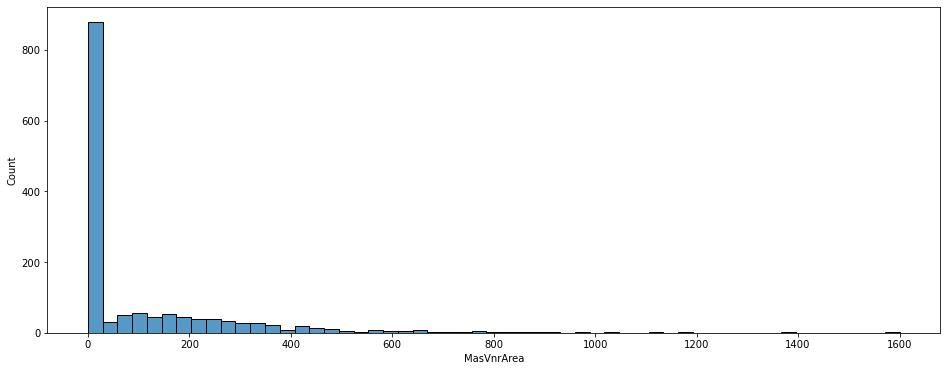

In [22]:
plt.figure(figsize= (16,6))
sns.histplot(data['MasVnrArea'])
plt.show()

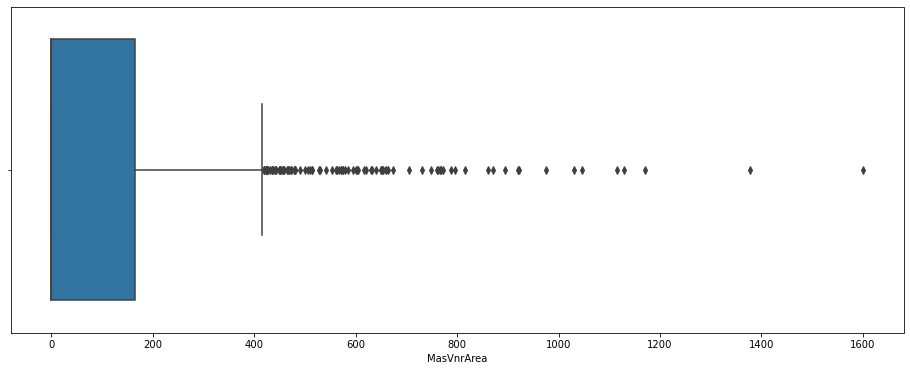

In [23]:
plt.figure(figsize= (16,6))
sns.boxplot(x = 'MasVnrArea' , data = data)
plt.show()

In [24]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [62]:
data.fillna({'MasVnrArea': data.MasVnrArea.mean()}, inplace = True)

Columnas asociadas con Basement : ***BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2*** 

In [63]:
# En la información del dataset, para cada una de estas variables se contempla el valor 'NA' (SIN SÓTANO). Al tener todos la misma cantidad de faltantes
# y estar en las mismas filas, claramente hace referencia a que esa propiedad no tiene sótano

data[['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [27]:
# Comprobamos que falta la categoría 'NA' (sin sótano)

data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [28]:
# Falta la categoría NA

data.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [64]:
# Rellenamos con NA

data.fillna({'BsmtQual': 'NA'}, inplace = True)

In [65]:
# Rellenamos con NA

data.fillna({'BsmtQual' : 'NA', 'BsmtCond': 'NA', 'BsmtCond' : 'NA', 'BsmtExposure': 'NA', 'BsmtFinType1' : 'NA', 'BsmtFinType2' : 'NA' }, inplace = True)

***Electrical***

In [31]:
data['Electrical'].isnull().sum()

1

In [32]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [66]:
data.fillna({'Electrical' : 'SBrkr'}, inplace = True)

Columnas asociadas con garage : ***'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'***

In [67]:
# Al igual que el caso de los sótanos, aquí todos los faltantes corresponden a instancias que no tienen garage y no está contemplada tal situación en el dataset

data[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [35]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [68]:
data.fillna({'GarageType' : 'NA', 'GarageFinish' : 'NA', 'GarageQual': 'NA', 'GarageCond' : 'NA'}, inplace = True)

In [69]:
# Años en que fue construído el garage

data.fillna({'GarageYrBlt' : 0}, inplace = True)

In [70]:
# Convertimos a entero

data.GarageYrBlt = data.GarageYrBlt.astype(int)

In [71]:
# Ya no tenemos más faltantes en nuestro set de datos

data[pd.isnull(data).any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### Correlación

Aquí, nos quedamos con las variables que son mejores predictoras

In [72]:
# Evaluamos las correlaciones respecto al precio

corr = data.corr()

#Nos quedamos con las columnas que tienen una correlación respecto al precio mayor a 0.3 o menor a -0.3

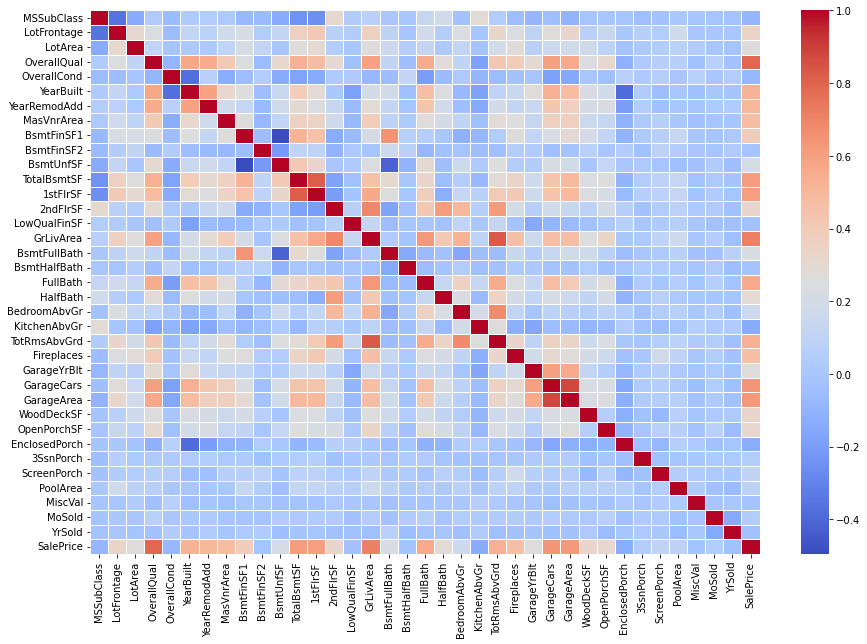

In [41]:
# Realizamos un mapa de calor para observar correlaciones

plt.subplots(figsize=(15,10))
sns.heatmap(corr, cmap= 'coolwarm', linewidth = 0.5)
plt.show()

## Reducción de la dimensionalidad

*A continuación, de las columnas cuantitativas nos quedaremos solamente con las que tienen una correlación con SalePrice (Pearson, Kendall o Spearman) mayores a 0.3 o menores a -0.3*

In [73]:
tipos_corr= ['pearson', 'kendall', 'spearman']
lista_columns = []

In [74]:
corr = data.corr('pearson')
per = (corr.SalePrice[(corr.SalePrice > 0.3) | (corr.SalePrice < -0.3)])
per = pd.DataFrame(per)
per['columns'] = per.index
per.reset_index(drop=True, inplace= True)
lista_columns.append(per['columns'].tolist())

In [75]:
corr = data.corr('kendall')
ken = (corr.SalePrice[(corr.SalePrice > 0.3) | (corr.SalePrice < -0.3)])
ken = pd.DataFrame(ken)
ken['columns'] = ken.index
ken.reset_index(drop=True, inplace= True)

In [76]:
corr = data.corr('spearman')
spe = (corr.SalePrice[(corr.SalePrice > 0.3) | (corr.SalePrice < -0.3)])
spe = pd.DataFrame(spe)
spe['columns'] = spe.index
spe.reset_index(drop=True, inplace= True)

Sumar a la correlación Perason las columnas LotArea (por correlación kendall) y HalfBath (por correlación spearman)

In [77]:
lista_columns.append(['LotArea', 'HalfBath'])

In [78]:
# Tenemos que omitir la última sublista y agregar todo como una lista única

import itertools
lista_columns = list(itertools.chain(*lista_columns))

In [79]:
lista_columns

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'LotArea',
 'HalfBath']

In [80]:
data_cuanti = pd.DataFrame(data, columns= lista_columns)

## Luego, incorporamos las columnas categóricas

Para que los modelos que instanciemos puedan utilizar las variables categóricas, es necesario pasarlas a numéricas

In [81]:
# Creamos una lista con todas las variables que son categóricas

variables_cat = list(data.dtypes[data.dtypes == object].index)

In [82]:
# Seteamos el índice para poder mergear posteriormente 

data['index'] = data.index

In [83]:
data_encoded = data[variables_cat].copy()

data_encoded['index'] = data_encoded.index

In [84]:
# Convertimos todas las columnas categóricas en cuantitativas

from sklearn.preprocessing import LabelEncoder

for i in variables_cat:
    le = LabelEncoder()
    data_encoded[i] = le.fit_transform(data_encoded[i])

In [147]:
# Convertimos todas las columnas categóricas en cuantitativas

from sklearn.preprocessing import OneHotEncoder

for i in variables_cat:

    data_encoded_i = data[[i]]
    one = OneHotEncoder(handle_unknown = 'ignore')
    column = pd.DataFrame(one.fit_transform(data_encoded_i).toarray())
    column['index'] = column.index
    data_encoded = pd.merge(data_encoded, column, on = 'index')

C:\Users\leand\AppData\Local\Temp\ipykernel_34868\3025123380.py:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x', '1_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_encoded = pd.merge(data_encoded, column, on = 'index')
C:\Users\leand\AppData\Local\Temp\ipykernel_34868\3025123380.py:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'3_x', '0_x', '1_x', '2_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_encoded = pd.merge(data_encoded, column, on = 'index')
C:\Users\leand\AppData\Local\Temp\ipykernel_34868\3025123380.py:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2_x', '0_x', '1_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_encoded = pd.merge(data_encoded, column, on = 'index')
C:\Users\leand\AppData\Local\Temp\ipykernel_34868\3025123380.py:11: FutureWarning: Passing 'suffixes' which cause duplica

In [148]:
# Quitamos las variables categóricas, que ya fueron transformadas, de nuestro dataset

data_encoded.drop(columns= variables_cat, inplace= True ) # ESTO PARA ONE HOT ENCODER NOMÁS

In [85]:
# Seteamos el índice como columna para poder mergear correctamente

data_cuanti['index'] = data_cuanti.index

In [86]:
# Unimos en un solo dataset las variables que separamos en un principio (con correlación mayor a 0.3) y  las que acabamos de convertir

data = pd.merge(data_cuanti, data_encoded, on = 'index')

In [87]:
# Ya no necesitamos la columna 'index' que fuimos creando para realizar los Merge correctamente

data.drop(columns = 'index', inplace = True)

#### Pasamos a explorar un poco las columnas

In [152]:
# TIPO DE VIVIENDA

data['MSSubClass'].unique()

KeyError: 'MSSubClass'

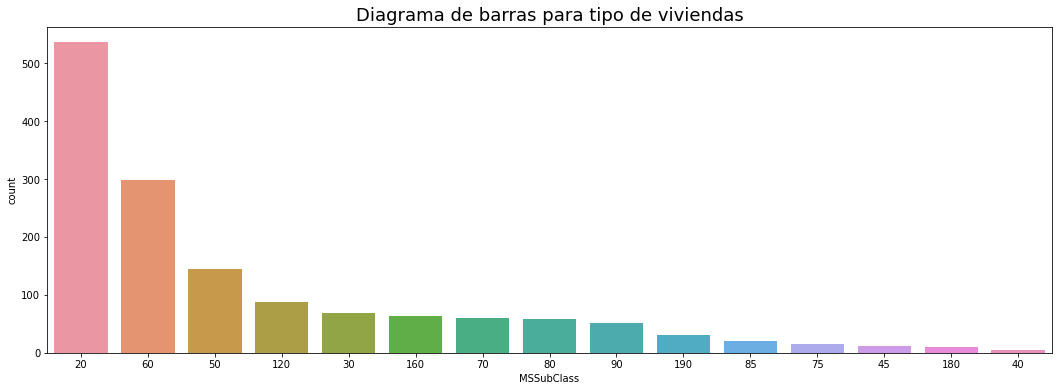

In [ ]:
plt.figure(figsize= (18,6))
sns.countplot(x = 'MSSubClass', data = data, order = data['MSSubClass'].value_counts().index)
plt.title('Diagrama de barras para tipo de viviendas', fontsize = 18)
plt.show()

*La mayoría de las viviendas corresponden a las categorías 20 y 60, que son viviendas posteriores a 1946*

In [ ]:
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

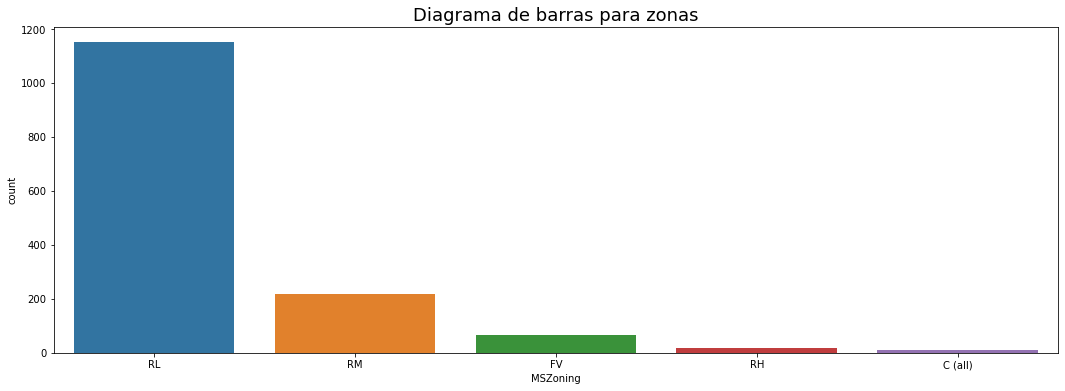

In [ ]:
plt.figure(figsize= (18,6))
sns.countplot(x = 'MSZoning', data = data, order = data['MSZoning'].value_counts().index)
plt.title('Diagrama de barras para zonas', fontsize = 18)
plt.show()

# Observamos que la mayoría de las viviendas se encuentran en zonas residenciales de baja densidad

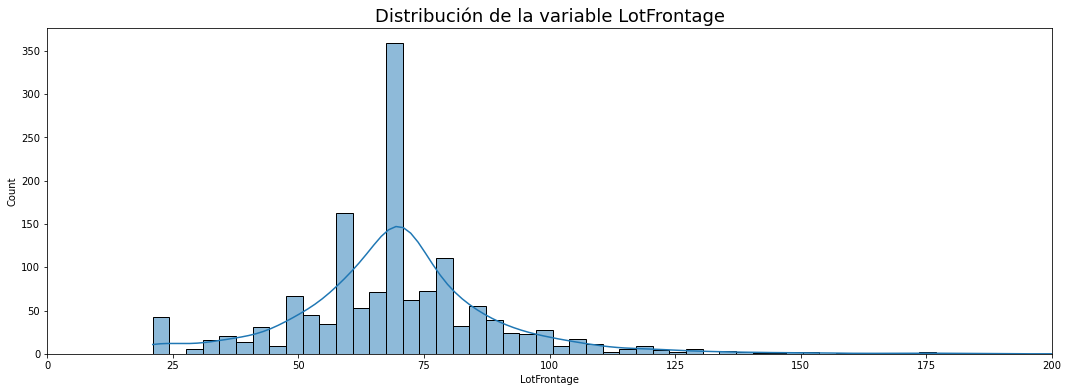

In [ ]:
plt.figure(figsize= (18,6))
sns.histplot(data['LotFrontage'], kde = True)
plt.title('Distribución de la variable LotFrontage', fontsize = 18)
plt.xlim([0,200])
plt.show()

## Escalado de datos

In [88]:
data.reset_index(inplace=True, drop = True)

In [90]:
data.head(5)

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,...,4,2,6,1,2,5,5,2,8,4
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,...,4,3,6,1,2,5,5,2,8,4
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,...,4,2,6,1,2,5,5,2,8,4
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,...,4,2,6,5,3,5,5,2,8,0
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,...,4,2,6,1,2,5,5,2,8,4


In [91]:
data_cuanti = data[lista_columns]

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()

#Para estandarizar, debo quedarme solamente con las variables de entrada que contienen atributos cuantitativos. 
# A su vez, la variable de salida no debemos escalarla


data_scaled = data_cuanti.drop(columns = 'SalePrice')

data_scaled = pd.DataFrame(scaler.fit_transform(data_scaled), columns = data_scaled.columns)

In [93]:
data_scaled.head(2)

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,LotArea,HalfBath
0,-0.229372,0.651479,1.050994,0.878668,0.511418,0.575425,-0.459303,-0.793434,1.161852,0.370333,0.789741,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.207142,1.227585
1,0.451936,-0.071836,0.156734,-0.429577,-0.574410,1.171992,0.466465,0.257140,-0.795163,-0.482512,0.789741,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.091886,-0.761621


In [94]:
# Volvemos a incoporar al dataset el atributo de salida 'y' así como las columnas categóricas codificadas

# Me quedo con las columnas de data que empiezan en la nùmero 20, ya que las anteriores son las cuantitativas sin escalar

# A su vez, debo volver a traer la columna SalePrice que quedó mezclada entre todas las primeras 20 que son cuantitativas

data.insert(58, 'SalePrice2', data.SalePrice) # ESTA POSICIÓN 263 ES PARA CUANDO HAGO ONE HOT ENCODER !!!!!!!!!!!

data_scaled = data_scaled.join(data.iloc[:,20:])

data_scaled.rename(columns= {'SalePrice2' : 'SalePrice'}, inplace = True)

In [99]:
data_scaled.to_csv(r'C:\Users\leand\Desktop\Data Science (Henry)\Proyectos\Hackathon\Housing Dreams\data_scaled.csv')

# Prueba de modelos

In [109]:
data_scaled = pd.read_csv('data_scaled.csv')

In [112]:
data_scaled.drop(columns = 'Unnamed: 0', inplace = True)

In [96]:
# Elegimos los atributos predictores y la variable a predecir

X = data_scaled.drop("SalePrice", axis=1)
y = data_scaled.SalePrice

In [114]:
# Dividimos los datos en un subset de entrenamiento y otro de testeo

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### ***Comenzamos con un algoritmo de vecinos más cercanos***

In [115]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 5
reg_knn = KNeighborsRegressor(n_neighbors = n_neighbors )

In [116]:
reg_knn.fit(X_train,y_train)

KNeighborsRegressor()

In [117]:
y_train_pred = reg_knn.predict(X_train)
y_test_pred = reg_knn.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
print('La precisión del KNN en set de train es:', reg_knn.score (X_train,y_train))
print('La precisión del KNN en set de test es:', reg_knn.score (X_test,y_test))

La precisión del KNN en set de train es: 0.8194762092651366
La precisión del KNN en set de test es: 0.7807091076171759


In [122]:
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(y_test, y_test_pred))

0.03526910195498133


c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'valor predicho(US$)')

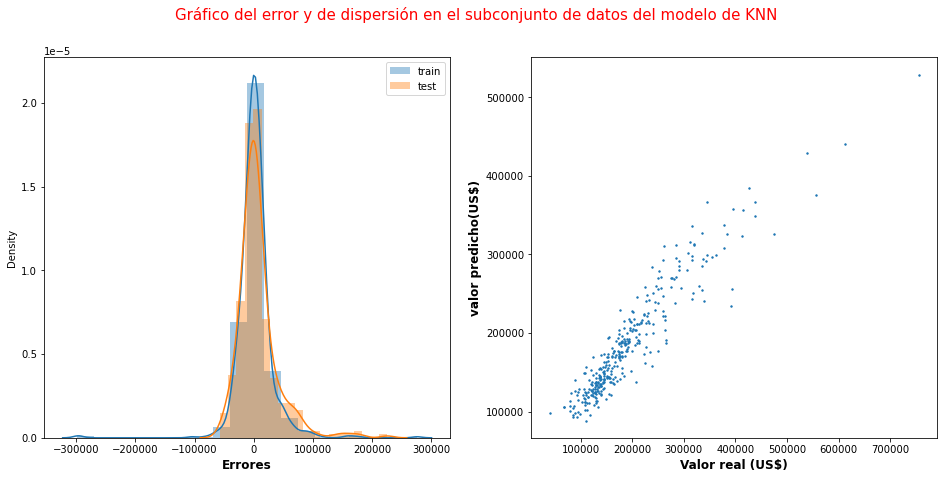

In [60]:
plt.figure(figsize = (16,7))
plt.suptitle('Gráfico del error y de dispersión en el subconjunto de datos del modelo de KNN', fontsize= 15, color='red')

plt.subplot (1,2,1)

sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('Errores', fontweight = "black", fontsize = 12)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test,y_test_pred, s =2)
plt.xlabel('Valor real (US$)', fontweight = "black", fontsize = 12)
plt.ylabel('valor predicho(US$)', fontweight = "black", fontsize = 12)

### ***Continuamos con un algoritmo de arból de regresión***

In [56]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=20)

In [57]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [58]:
y_train_pred = tree_regressor.predict (X_train)
y_test_pred = tree_regressor.predict (X_test)

In [64]:
print('La precisión del modelo de árbol de regresión en set de train es:', tree_regressor.score (X_train,y_train))
print('La precisión del modelo de árbol de regresión en set de test es:', tree_regressor.score (X_test,y_test))

La precisión del modelo de árbol de regresión en set de train es: 0.9999884974936786
La precisión del modelo de árbol de regresión en set de test es: 0.7881050431315748


### ***En esta instancia, probamos un Random Forest***

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

randomf = RandomForestRegressor()

randomf_scores = cross_val_score(randomf, X, y, cv=5)
randomf.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
print(randomf_scores)
print("Precisión para Random Forest: %0.2f (+/- %0.2f)" % (randomf_scores.mean(), randomf_scores.std() * 2))

[0.86676771 0.83926209 0.87983951 0.88203501 0.83980816]
Precisión para Random Forest: 0.86 (+/- 0.04)


Text(0, 0.5, 'Valor predicho (US$)')

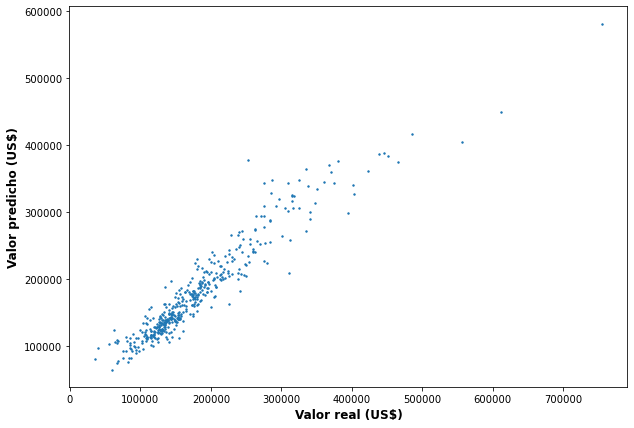

In [71]:
y_train_pred3 = randomf.predict(X_train)
y_test_pred3 = randomf.predict(X_test)

plt.figure(figsize = (10,7))

plt.scatter(y_test,y_test_pred3, s =2)
plt.xlabel('Valor real (US$)', fontweight = "black", fontsize = 12)
plt.ylabel('Valor predicho (US$)', fontweight = "black", fontsize = 12)

In [73]:
# CON LABEL ENCODER EL ERROR DA 0.02

rmse_train = (mean_squared_log_error(y_train, y_train_pred3))
rmse_test = (mean_squared_log_error(y_test, y_test_pred3))
print(f'mean_squared_log_error en Train es: {rmse_train}')
print(f'mean_squared_log_error en Test es: {rmse_test}')
print('La precisión del modelo de Random Forest en train es:', randomf.score (X_train,y_train))
print('La precisión del modelo de Random Forest en test es:', randomf.score (X_test,y_test))

mean_squared_log_error en Train es: 0.0037102133988009124
mean_squared_log_error en Test es: 0.020238047274965375
La precisión del modelo de Random Forest en train es: 0.9775881090103763
La precisión del modelo de Random Forest en test es: 0.8965933139581465


### Optimización de hiperparámetros

In [420]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp

In [421]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400]}

In [422]:
model = GridSearchCV(randomf, param_grid, cv=5)

model.fit(X_train, y_train)

KeyboardInterrupt: 

In [151]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores hiperparámetros: {'max_features': 6, 'n_estimators': 167, 'n_jobs': -1, 'random_state': 42}
Mejor Score: 0.8022192067603328



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_n_jobs,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039804,0.002139,0.020596,0.018707,3,20,-1,42,"{'max_features': 3, 'n_estimators': 20, 'n_job...",0.759520,0.827697,0.768500,0.829069,0.755201,0.787997,0.033255,18
1,0.069009,0.003574,0.015993,0.000886,3,50,-1,42,"{'max_features': 3, 'n_estimators': 50, 'n_job...",0.747206,0.830561,0.744601,0.816521,0.760813,0.779941,0.036296,26
2,0.111984,0.003855,0.019785,0.000742,3,75,-1,42,"{'max_features': 3, 'n_estimators': 75, 'n_job...",0.751464,0.831765,0.749651,0.815494,0.756693,0.781013,0.035250,22
3,0.139001,0.006956,0.022999,0.001094,3,107,-1,42,"{'max_features': 3, 'n_estimators': 107, 'n_jo...",0.755508,0.831706,0.746286,0.804759,0.766386,0.780929,0.032262,23
4,0.136607,0.005346,0.025994,0.001259,3,127,-1,42,"{'max_features': 3, 'n_estimators': 127, 'n_jo...",0.756716,0.832923,0.747744,0.806663,0.766394,0.782088,0.032427,20
5,0.170410,0.003010,0.029393,0.000801,3,147,-1,42,"{'max_features': 3, 'n_estimators': 147, 'n_jo...",0.757940,0.829023,0.749053,0.805275,0.759404,0.780139,0.031339,25
6,0.202728,0.007050,0.033383,0.002870,3,167,-1,42,"{'max_features': 3, 'n_estimators': 167, 'n_jo...",0.758432,0.831361,0.746100,0.804111,0.761363,0.780273,0.032189,24
7,0.166810,0.002321,0.033990,0.001415,3,187,-1,42,"{'max_features': 3, 'n_estimators': 187, 'n_jo...",0.758640,0.831192,0.746991,0.807344,0.763413,0.781516,0.032180,21
8,0.237019,0.009662,0.038992,0.001670,3,220,-1,42,"{'max_features': 3, 'n_estimators': 220, 'n_jo...",0.759408,0.834705,0.747836,0.810485,0.769562,0.784399,0.032841,19
9,0.039810,0.001328,0.011790,0.000744,5,20,-1,42,"{'max_features': 5, 'n_estimators': 20, 'n_job...",0.755101,0.823724,0.735637,0.814792,0.753147,0.776480,0.035692,27


In [107]:
y_train_pred_7 = model.predict(X_train)
y_test_pred_7= model.predict(X_test)
rmse_train = (mean_squared_log_error(y_train, y_train_pred_7))
rmse_test = (mean_squared_log_error(y_test, y_test_pred_7))

print('La precisión del modelo de Random Forest con optimización de hiperparámetros es:', model.score (X_test,y_test))

print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')

NameError: name 'model' is not defined

### Interpretación del modelo

In [132]:
randomf_best = RandomForestRegressor(max_features= 6, n_estimators= 187, n_jobs= -1, random_state= 42)
randomf_best.fit(X_train, y_train)

c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(max_features=6, n_estimators=187, n_jobs=-1,
                      random_state=42)

In [140]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': randomf_best.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,OverallQual,0.043490
9,GrLivArea,0.042917
6,TotalBsmtSF,0.041029
15,GarageArea,0.033520
7,1stFlrSF,0.030927
...,...,...
36,1_x,0.000000
222,5_y,0.000000
230,6_x,0.000000
234,3_x,0.000000


### Comprobaremos la performance de una regresión lineal con atributos polinómicos

In [120]:
import xgboost as xgb

In [126]:
modelo = xgb.XGBClassifier()
modelo.fit(X_train, y_train)

# Realizo las predicciones
y_pred = modelo.predict(X_train)
predicciones = [round(value) for value in y_pred]
# Evalúo las predicciones
precision_train = accuracy_score(y_train, predicciones)

# Repito el proceso con datos de evaluacion
y_pred = modelo.predict(X_test)
predicciones = [round(value) for value in y_pred]

# Evalúo las predicciones
precision_test = accuracy_score(y_test, predicciones)
print(modelo)
print('Precisión xgboost train/test  {0:.3f}/{1:.3f}'
      .format(precision_train, precision_test))

c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:17:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
Precisión xgboost train/test  0.906/0.007


In [123]:
y_train_pred3 = modelo.predict(X_train)
y_test_pred3 = modelo.predict(X_test)

In [125]:
rmse_train = (mean_squared_log_error(y_train, y_train_pred3, squared = False))
rmse_test = (mean_squared_log_error(y_test, y_test_pred3, squared = False))
print(f'mean_squared_log_error en Train es: {rmse_train}')
print(f'mean_squared_log_error en Test es: {rmse_test}')


mean_squared_log_error en Train es: 0.1075338133830739
mean_squared_log_error en Test es: 0.22972810782043096
La precisión del modelo de Random Forest en train es: 0.9060665362035225
La precisión del modelo de Random Forest en test es: 0.00684931506849315


In [102]:
parametros = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "binary:logistic", "nthread":2}
rondas = 10

In [103]:
evaluacion = [(agar_test_mat, "eval"), (agar_train_mat, "train")]

NameError: name 'agar_test_mat' is not defined

In [101]:
modelo = xgb.train(parametros, (X_train, y_train), rondas, evaluacion)

NameError: name 'parametros' is not defined